In [1]:
# Import numerical packages
import numpy as np
import sklearn as sk
import pandas as pd

import xgboost as xgb

/Users/nicholashirons/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [38]:
column_types = pd.DataFrame(df.dtypes, columns = ['dtypes'])

In [6]:
print('There are', df.shape[0], 'training examples and', df.shape[1]-1, 'features.')

There are 595212 training examples and 58 features.


In [7]:
from feature_types import *

In [11]:
# Return dictionaries of labels, types, and a nested dictionary of labels and types
label_dict = label_parser(df.columns)
type_dict = type_parser(df.columns)
parsed_dict = total_parser(df.columns)

In [16]:
df['target'].unique()

array([0, 1])

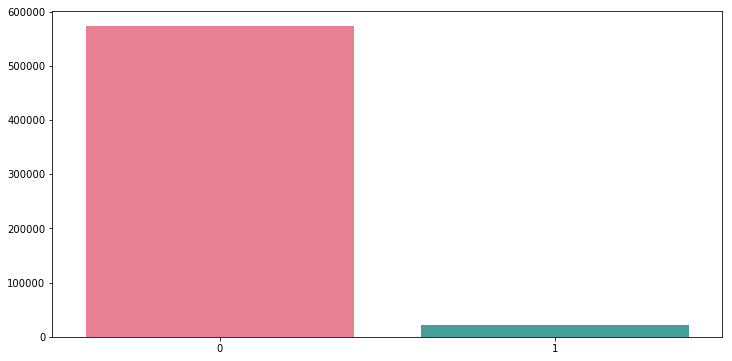

In [74]:
# Examine distribution of target / output
hist = df.groupby(['target'],as_index=False).count()['id']
fig,axarr = plt.subplots(1,1,figsize=(12,6))
sns.barplot(x=hist.index,y=hist.values,palette="husl")
plt.show()

In [37]:
print('There are',hist[0],'zeros and',hist[1], 'ones.')
print(round(hist[0]/hist.sum()*100,1),'% are zeros and',round(hist[1]/hist.sum()*100,1), '% are ones.')

There are 573518 zeros and 21694 ones.
96.4 % are zeros and 3.6 % are ones.


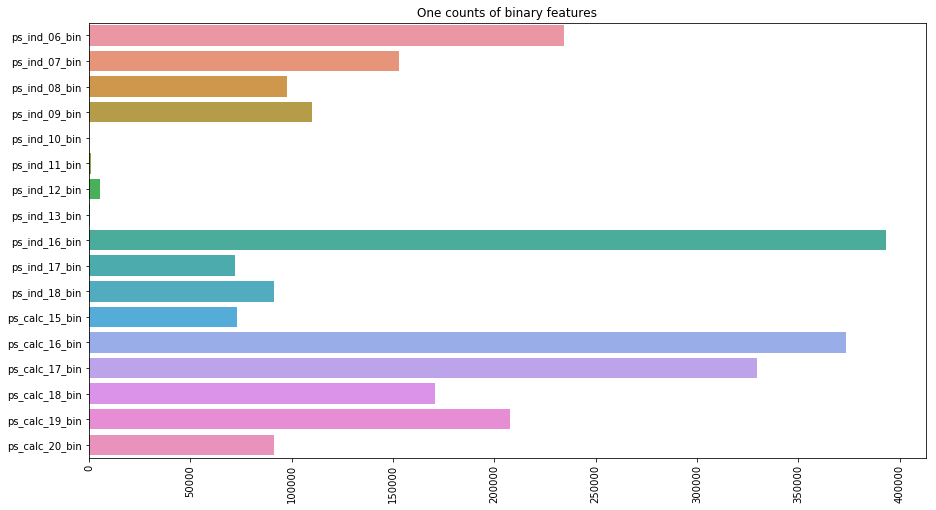

In [104]:
f,axarray = plt.subplots(1,1,figsize=(15,8))
plt.title('One counts of binary features')
plt.xticks(rotation = 'vertical')
bins = df[type_dict['bin']].sum()
sns.barplot(x=bins.values,y=bins.index,orient='h')
plt.show()

In [109]:
type(bins)

pandas.core.series.Series

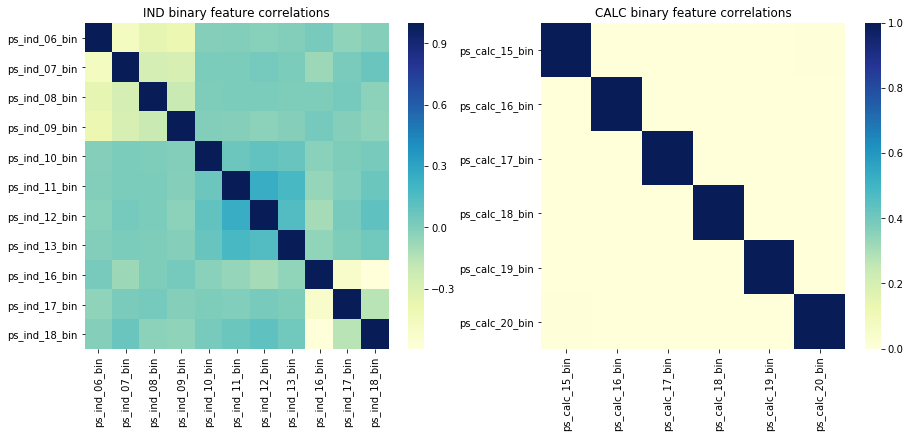

In [59]:
f,axarray = plt.subplots(1,2,figsize=(15,6))
plt.xticks(rotation='vertical')

sns.heatmap(df[parsed_dict['ind']['bin']].corr(),ax=axarray[0],cmap="YlGnBu")
sns.heatmap(df[parsed_dict['calc']['bin']].corr(),ax=axarray[1],cmap="YlGnBu")

axarray[0].set_title('IND binary feature correlations')
axarray[1].set_title('CALC binary feature correlations')

plt.show()

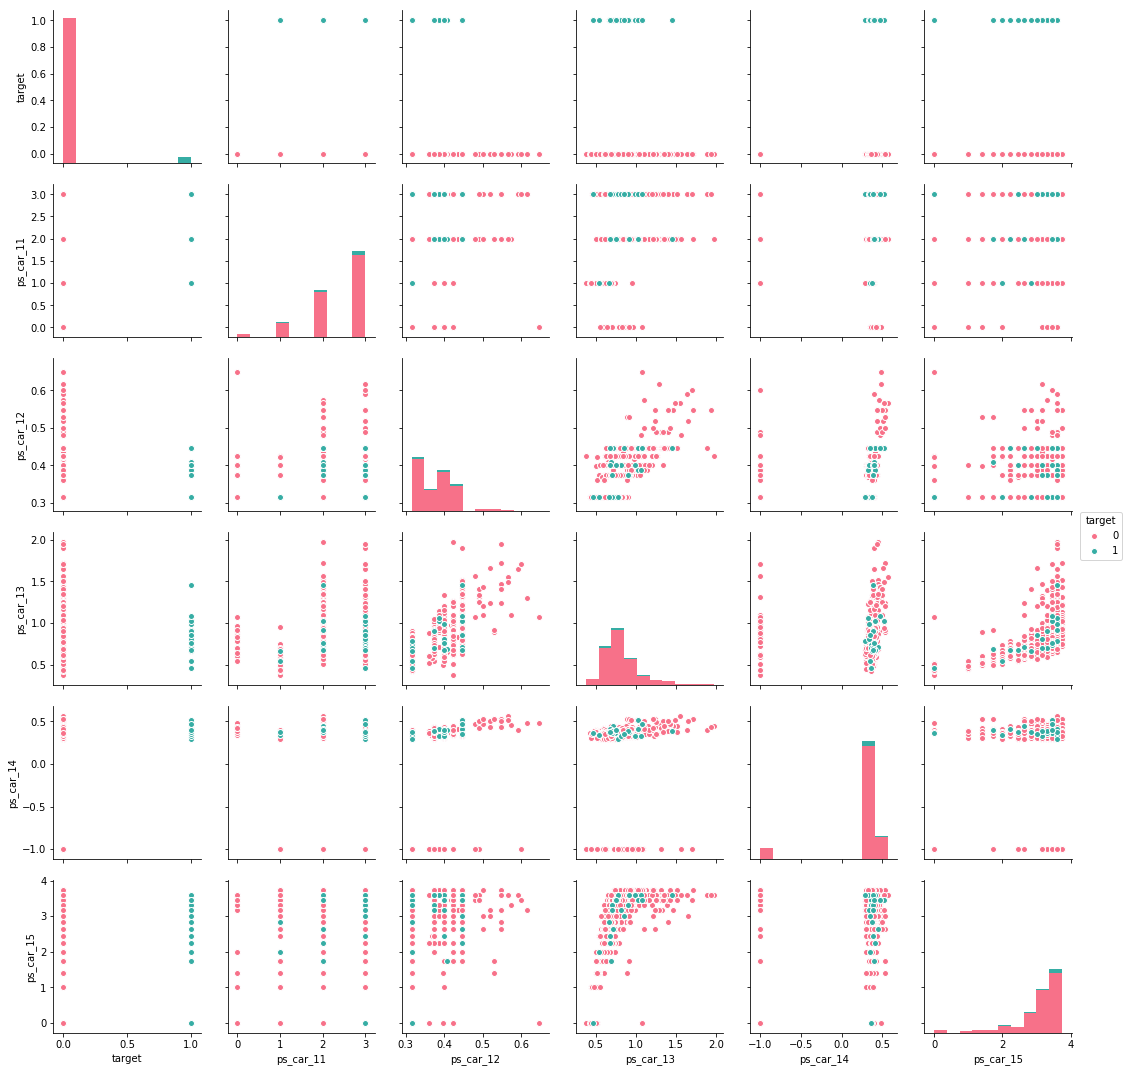

In [68]:
tmp = pd.concat([df['target'],df[parsed_dict['car']['con']]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl")
plt.show()

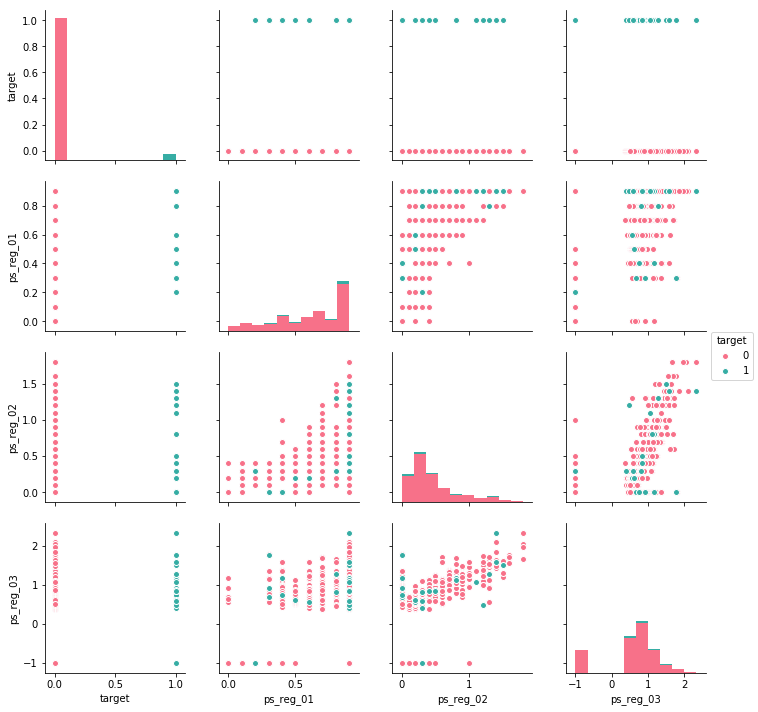

In [69]:
tmp = pd.concat([df['target'],df[parsed_dict['reg']['con']]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl")
plt.show()

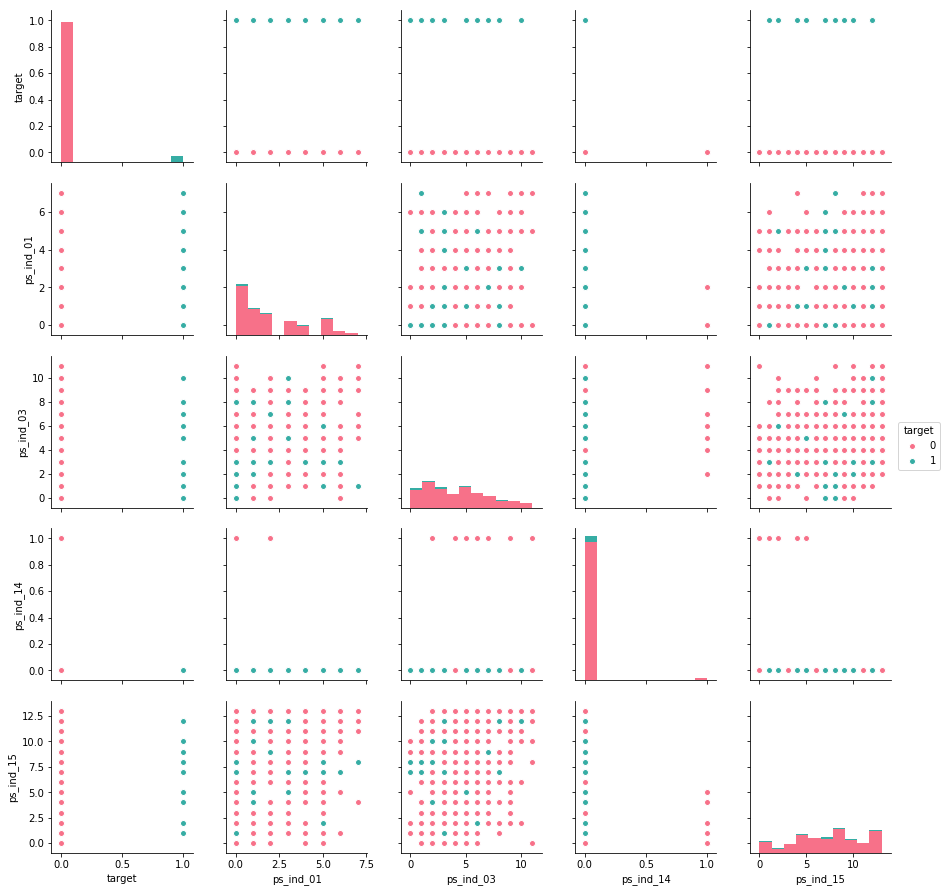

In [70]:
tmp = pd.concat([df['target'],df[parsed_dict['ind']['con']]],axis=1)
sns.pairplot(tmp[0:500],hue='target',palette="husl")
plt.show()

In [154]:
df = df.replace(-1,np.NaN)
df_nan = df.isnull()

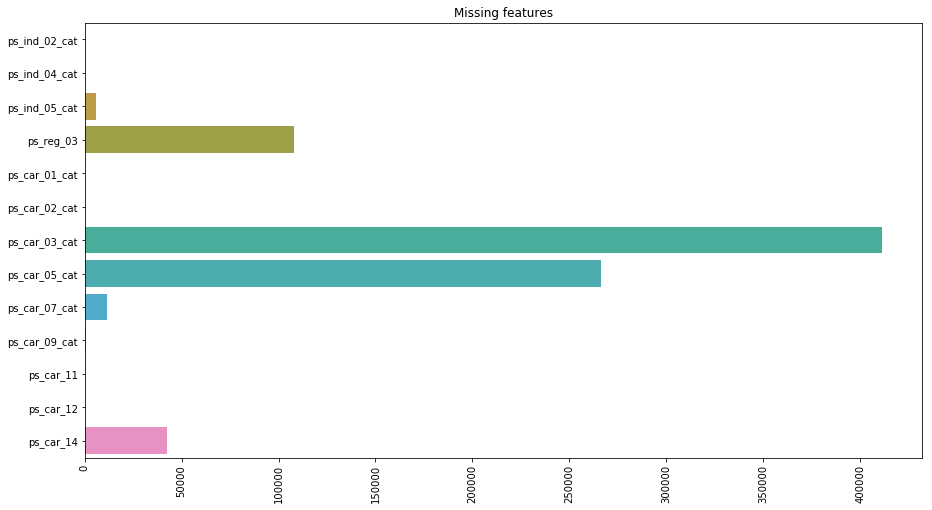

In [163]:
f,axarray = plt.subplots(1,1,figsize=(15,8))
plt.title('Missing features')
plt.xticks(rotation = 'vertical')
bins = df_nan.sum()[df_nan.sum() > 0]
sns.barplot(x=bins.values,y=bins.index,orient='h')
plt.show()

In [183]:
df_nan_only = df_nan[[col for col in df_nan.columns if df_nan[col].sum() > 0]]

In [185]:
pd.concat([df['target'],df_nan_only], axis = 1)

,target,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_14
0,0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0,False,False,False,False,False,False,True,True,False,False,False,False,False
2,0,False,False,False,True,False,False,True,True,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,False,False,True,True,False,False,False,False,False
5,0,False,False,False,False,False,False,True,False,False,False,False,False,False
6,0,False,False,False,False,False,False,True,False,False,False,False,False,False
7,0,False,False,False,False,False,False,False,False,False,False,False,False,False
8,0,False,False,False,False,False,False,True,False,False,False,False,False,False
9,1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [186]:
pd.crosstab(df['target'], df_nan_only['ps_ind_02_cat'])

ps_ind_02_cat,False,True
target,,
0,573342,176
1,21654,40
